In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
appearances=pd.read_csv('appearances.csv')
games=pd.read_csv('games.csv')
shots=pd.read_csv('shots.csv')
league=pd.read_csv('leagues.csv')
team=pd.read_csv('teams.csv')
players=pd.read_csv('players.csv', encoding="ISO-8859-1")

# Players

In [3]:
players.isnull().sum()

playerID    0
name        0
dtype: int64

In [4]:
shots

,gameID,shooterID,assisterID,minute,situation,lastAction,shotType,shotResult,xGoal,positionX,positionY
0,81,554,NaN,27,DirectFreekick,Standard,LeftFoot,BlockedShot,0.104347,0.794,0.421
1,81,555,631.0,27,SetPiece,Pass,RightFoot,BlockedShot,0.064342,0.860,0.627
2,81,554,629.0,35,OpenPlay,Pass,LeftFoot,BlockedShot,0.057157,0.843,0.333
3,81,554,NaN,35,OpenPlay,Tackle,LeftFoot,MissedShots,0.092141,0.848,0.533
4,81,555,654.0,40,OpenPlay,BallRecovery,RightFoot,BlockedShot,0.035742,0.812,0.707
...,...,...,...,...,...,...,...,...,...,...,...
324538,16135,6615,8651.0,19,SetPiece,Aerial,Head,MissedShots,0.039172,0.899,0.511
324539,16135,6615,8651.0,54,SetPiece,Cross,LeftFoot,Goal,0.372809,0.902,0.482
324540,16135,3464,NaN,70,OpenPlay,None,LeftFoot,MissedShots,0.009242,0.738,0.774
324541,16135,8651,4882.0,72,OpenPlay,Cross,Head,BlockedShot,0.045374,0.882,0.543


In [5]:
shots=shots.rename({'shooterID':'playerID'},axis=1)

In [6]:
shots

,gameID,playerID,assisterID,minute,situation,lastAction,shotType,shotResult,xGoal,positionX,positionY
0,81,554,NaN,27,DirectFreekick,Standard,LeftFoot,BlockedShot,0.104347,0.794,0.421
1,81,555,631.0,27,SetPiece,Pass,RightFoot,BlockedShot,0.064342,0.860,0.627
2,81,554,629.0,35,OpenPlay,Pass,LeftFoot,BlockedShot,0.057157,0.843,0.333
3,81,554,NaN,35,OpenPlay,Tackle,LeftFoot,MissedShots,0.092141,0.848,0.533
4,81,555,654.0,40,OpenPlay,BallRecovery,RightFoot,BlockedShot,0.035742,0.812,0.707
...,...,...,...,...,...,...,...,...,...,...,...
324538,16135,6615,8651.0,19,SetPiece,Aerial,Head,MissedShots,0.039172,0.899,0.511
324539,16135,6615,8651.0,54,SetPiece,Cross,LeftFoot,Goal,0.372809,0.902,0.482
324540,16135,3464,NaN,70,OpenPlay,None,LeftFoot,MissedShots,0.009242,0.738,0.774
324541,16135,8651,4882.0,72,OpenPlay,Cross,Head,BlockedShot,0.045374,0.882,0.543


In [7]:
shots=shots.merge(players,on='playerID',how='left')

In [8]:
shots

,gameID,playerID,assisterID,minute,situation,lastAction,shotType,shotResult,xGoal,positionX,positionY,name
0,81,554,NaN,27,DirectFreekick,Standard,LeftFoot,BlockedShot,0.104347,0.794,0.421,Juan Mata
1,81,555,631.0,27,SetPiece,Pass,RightFoot,BlockedShot,0.064342,0.860,0.627,Memphis Depay
2,81,554,629.0,35,OpenPlay,Pass,LeftFoot,BlockedShot,0.057157,0.843,0.333,Juan Mata
3,81,554,NaN,35,OpenPlay,Tackle,LeftFoot,MissedShots,0.092141,0.848,0.533,Juan Mata
4,81,555,654.0,40,OpenPlay,BallRecovery,RightFoot,BlockedShot,0.035742,0.812,0.707,Memphis Depay
...,...,...,...,...,...,...,...,...,...,...,...,...
324538,16135,6615,8651.0,19,SetPiece,Aerial,Head,MissedShots,0.039172,0.899,0.511,Trevoh Chalobah
324539,16135,6615,8651.0,54,SetPiece,Cross,LeftFoot,Goal,0.372809,0.902,0.482,Trevoh Chalobah
324540,16135,3464,NaN,70,OpenPlay,None,LeftFoot,MissedShots,0.009242,0.738,0.774,Vincent Le Goff
324541,16135,8651,4882.0,72,OpenPlay,Cross,Head,BlockedShot,0.045374,0.882,0.543,Enzo Le Fée


In [9]:
shots=shots.drop('playerID',axis=1)

In [10]:
shots=shots.rename({'name':'shooter_name'},axis=1)
shots=shots.rename({'assisterID':'playerID'},axis=1)

In [11]:
shots

,gameID,playerID,minute,situation,lastAction,shotType,shotResult,xGoal,positionX,positionY,shooter_name
0,81,NaN,27,DirectFreekick,Standard,LeftFoot,BlockedShot,0.104347,0.794,0.421,Juan Mata
1,81,631.0,27,SetPiece,Pass,RightFoot,BlockedShot,0.064342,0.860,0.627,Memphis Depay
2,81,629.0,35,OpenPlay,Pass,LeftFoot,BlockedShot,0.057157,0.843,0.333,Juan Mata
3,81,NaN,35,OpenPlay,Tackle,LeftFoot,MissedShots,0.092141,0.848,0.533,Juan Mata
4,81,654.0,40,OpenPlay,BallRecovery,RightFoot,BlockedShot,0.035742,0.812,0.707,Memphis Depay
...,...,...,...,...,...,...,...,...,...,...,...
324538,16135,8651.0,19,SetPiece,Aerial,Head,MissedShots,0.039172,0.899,0.511,Trevoh Chalobah
324539,16135,8651.0,54,SetPiece,Cross,LeftFoot,Goal,0.372809,0.902,0.482,Trevoh Chalobah
324540,16135,NaN,70,OpenPlay,None,LeftFoot,MissedShots,0.009242,0.738,0.774,Vincent Le Goff
324541,16135,4882.0,72,OpenPlay,Cross,Head,BlockedShot,0.045374,0.882,0.543,Enzo Le Fée


In [12]:
shots=shots.merge(players,on='playerID',how='left')

In [13]:
shots=shots.rename({'name':'assister_name'},axis=1)
shots=shots.drop('playerID',axis=1)

In [14]:
shots

,gameID,minute,situation,lastAction,shotType,shotResult,xGoal,positionX,positionY,shooter_name,assister_name
0,81,27,DirectFreekick,Standard,LeftFoot,BlockedShot,0.104347,0.794,0.421,Juan Mata,NaN
1,81,27,SetPiece,Pass,RightFoot,BlockedShot,0.064342,0.860,0.627,Memphis Depay,Ashley Young
2,81,35,OpenPlay,Pass,LeftFoot,BlockedShot,0.057157,0.843,0.333,Juan Mata,Wayne Rooney
3,81,35,OpenPlay,Tackle,LeftFoot,MissedShots,0.092141,0.848,0.533,Juan Mata,NaN
4,81,40,OpenPlay,BallRecovery,RightFoot,BlockedShot,0.035742,0.812,0.707,Memphis Depay,Michael Carrick
...,...,...,...,...,...,...,...,...,...,...,...
324538,16135,19,SetPiece,Aerial,Head,MissedShots,0.039172,0.899,0.511,Trevoh Chalobah,Enzo Le Fée
324539,16135,54,SetPiece,Cross,LeftFoot,Goal,0.372809,0.902,0.482,Trevoh Chalobah,Enzo Le Fée
324540,16135,70,OpenPlay,None,LeftFoot,MissedShots,0.009242,0.738,0.774,Vincent Le Goff,NaN
324541,16135,72,OpenPlay,Cross,Head,BlockedShot,0.045374,0.882,0.543,Enzo Le Fée,Laurent Abergel


#### xG

In [15]:
xG=shots.groupby('shooter_name').sum()[['xGoal']]
xG

,xGoal
shooter_name,
Aaron Connolly,9.334815
Aaron Cresswell,5.931078
Aaron Hickey,0.038924
Aaron Hunt,8.534531
Aaron Lennon,5.327926
...,...
Óscar Rodríguez,9.243202
Óscar Romero,1.054866
Óscar Trejo,11.101078


In [16]:
xG.reset_index(inplace=True)

In [17]:
xG=xG.rename(columns={'shooter_name':'Player'})
xG

,Player,xGoal
0,Aaron Connolly,9.334815
1,Aaron Cresswell,5.931078
2,Aaron Hickey,0.038924
3,Aaron Hunt,8.534531
4,Aaron Lennon,5.327926
...,...,...
5260,Óscar Rodríguez,9.243202
5261,Óscar Romero,1.054866
5262,Óscar Trejo,11.101078
5263,Ömer Toprak,5.458648


#### Total shots player wise

In [18]:
Shot=shots['shooter_name'].value_counts().reset_index()
Shot.columns=['Player','Shots']
Shot

,Player,Shots
0,Cristiano Ronaldo,1463
1,Lionel Messi,1392
2,Robert Lewandowski,974
3,Lorenzo Insigne,965
4,Harry Kane,889
...,...,...
5260,Lee Peltier,1
5261,Tim Ream,1
5262,Harvey Elliott,1
5263,Alessio Da Cruz,1


#### Penalty taken by players

In [19]:
Penalty=shots[['situation','shooter_name']].value_counts()['Penalty'].reset_index()
Penalty.columns=['Player','Penalty Attempted']
Penalty

,Player,Penalty Attempted
0,Cristiano Ronaldo,60
1,Ciro Immobile,45
2,Lionel Messi,39
3,Fabio Quagliarella,35
4,Robert Lewandowski,33
...,...,...
894,Ludovic Blas,1
895,Luiz Adriano,1
896,Luka Jovic,1
897,Lukasz Teodorczyk,1


#### Freekick taken by players

In [20]:
Freekick_attempted=shots[['situation','shooter_name']].value_counts()['DirectFreekick'].reset_index()
Freekick_attempted.columns=['Player','Freekick Attempted']
Freekick_attempted

,Player,Freekick Attempted
0,Lionel Messi,284
1,Cristiano Ronaldo,141
2,Hakan Calhanoglu,132
3,Christian Eriksen,114
4,Daniel Parejo,112
...,...,...
1609,Bukayo Saka,1
1610,Arnaut Danjuma Groeneveld,1
1611,Arbër Zeneli,1
1612,Archimede Morleo,1


#### Goals

In [21]:
goals=shots.loc[shots['shotResult']=='Goal']

In [22]:
goals

,gameID,minute,situation,lastAction,shotType,shotResult,xGoal,positionX,positionY,shooter_name,assister_name
35,82,71,FromCorner,Cross,Head,Goal,0.374082,0.930,0.503,Rudy Gestede,Ashley Westwood
44,83,75,OpenPlay,Pass,RightFoot,Goal,0.019270,0.758,0.585,Ross Barkley,Arouna Koné
45,83,85,OpenPlay,Pass,RightFoot,Goal,0.069516,0.933,0.330,Arouna Koné,Romelu Lukaku
49,83,13,OpenPlay,None,RightFoot,Goal,0.093540,0.887,0.460,Miguel Layún,NaN
56,83,82,OpenPlay,TakeOn,RightFoot,Goal,0.114176,0.842,0.497,Odion Ighalo,Troy Deeney
...,...,...,...,...,...,...,...,...,...,...,...
324483,16133,24,OpenPlay,Cross,Head,Goal,0.579342,0.969,0.445,Sehrou Guirassy,Jéremy Doku
324488,16133,50,OpenPlay,None,RightFoot,Goal,0.028437,0.773,0.662,Benjamin Bourigeaud,NaN
324522,16134,38,OpenPlay,Chipped,RightFoot,Goal,0.071497,0.894,0.614,Aboubakar Kamara,Moussa Konate
324530,16135,17,OpenPlay,None,Head,Goal,0.220236,0.868,0.555,Habib Diallo,NaN


#### Goals scorers

In [23]:
Goals_Scored = goals['shooter_name'].value_counts().reset_index()
Goals_Scored.columns=['Player','Goals']
Goals_Scored.sort_values(by='Goals', ascending=False)

,Player,Goals
0,Lionel Messi,272
1,Cristiano Ronaldo,241
2,Robert Lewandowski,207
3,Luis Suárez,176
4,Harry Kane,163
...,...,...
2946,Terrence Boyd,1
2947,Florent Hadergjonaj,1
2948,Carlos Clerc,1
2949,Antonio Luna,1


Text(0.5, 1.0, 'Top 20 Goal Scorer (2014-2020)')

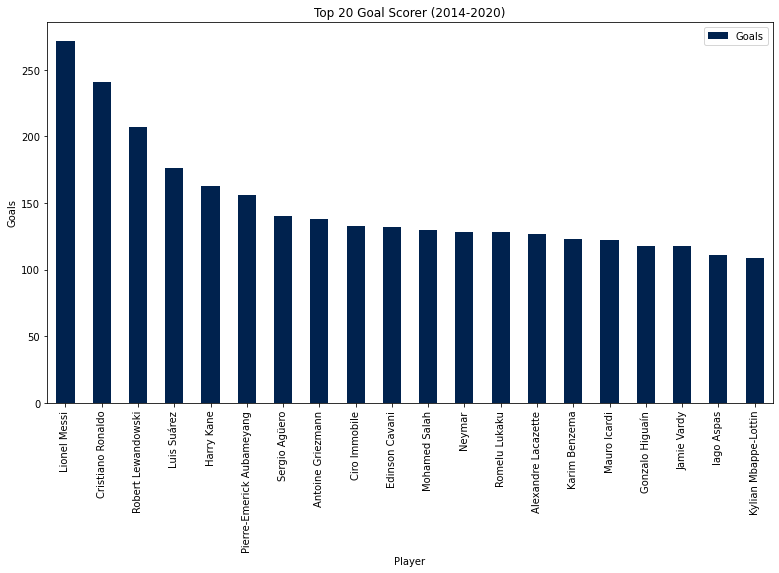

In [24]:
Goals_Scored.head(20).plot('Player','Goals',kind='bar',figsize=(13,7),colormap='cividis')

plt.ylabel('Goals')
plt.title('Top 20 Goal Scorer (2014-2020)')

#### Assist

In [25]:
Assist=goals['assister_name'].value_counts().reset_index()
Assist.columns=['Player','Assists']
Assist

,Player,Assists
0,Luis Suárez,146
1,Kevin De Bruyne,97
2,Lionel Messi,97
3,Koke,94
4,Thomas Müller,87
...,...,...
3492,Rodrigo Aguirre,1
3493,Badou Ndiaye,1
3494,Alfie Mawson,1
3495,Oliver McBurnie,1


#### goals type

In [26]:
goals['situation'].value_counts()

OpenPlay          24457
FromCorner         4029
Penalty            3078
SetPiece           2066
DirectFreekick      868
Name: situation, dtype: int64

Text(0.5, 1.0, 'Goals from different situation')

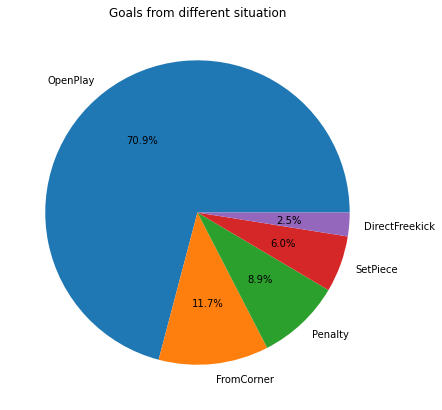

In [27]:
fig = plt.figure(figsize =(10, 7),facecolor='white')
plt.pie(goals['situation'].value_counts(), labels=goals['situation'].value_counts().index, autopct='%1.1f%%')
plt.title('Goals from different situation')

<BarContainer object of 2 artists>

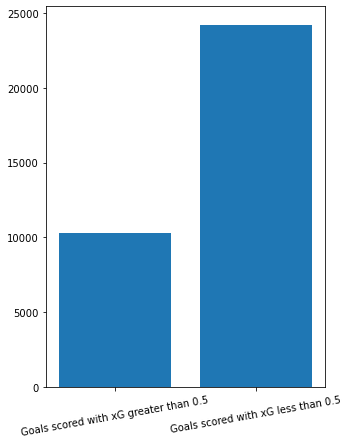

In [28]:
x=goals['xGoal'][goals['xGoal']>=0.5].count()
y=goals['xGoal'][goals['xGoal']<0.5].count()   
X=['Goals scored with xG greater than 0.5','Goals scored with xG less than 0.5']
Y=[x,y]
plt.figure(figsize=(5,7),facecolor='white')
plt.xticks(rotation=10)
plt.bar(X,Y)

In [29]:
Freekick_Goals=goals[['situation','shooter_name']].value_counts()['DirectFreekick'].reset_index()
Freekick_Goals.columns=['Player','Freekick Goals']
Freekick_Goals

,Player,Freekick Goals
0,Lionel Messi,28
1,Daniel Parejo,11
2,Miralem Pjanic,11
3,Paulo Dybala,10
4,Hakan Calhanoglu,10
...,...,...
429,Änis Ben-Hatira,1
430,Álvaro Vázquez,1
431,Álvaro Vadillo,1
432,Álex Gallar,1


In [30]:
Penalty_Goals=goals[['situation','shooter_name']].value_counts()['Penalty'].reset_index()
Penalty_Goals.columns=['Player','Penalty Goals']
Penalty_Goals

,Player,Penalty Goals
0,Cristiano Ronaldo,48
1,Ciro Immobile,37
2,Robert Lewandowski,30
3,Fabio Quagliarella,30
4,Lionel Messi,28
...,...,...
757,Adama Diakhaby,1
758,Aday Benítez,1
759,Adrien Hunou,1
760,Adrien Regattin,1


In [31]:
Openplay_goals=goals[['situation','shooter_name']].value_counts()['OpenPlay'].reset_index()
Openplay_goals.columns=['Player','Openplay goals']
Openplay_goals

,Player,Openplay goals
0,Lionel Messi,207
1,Cristiano Ronaldo,164
2,Robert Lewandowski,159
3,Luis Suárez,146
4,Pierre-Emerick Aubameyang,127
...,...,...
2797,Willem Geubbels,1
2798,Willi Orban,1
2799,Iuri Medeiros,1
2800,Iturraspe,1


In [32]:
Setpiece_goals=goals[['situation','shooter_name']].value_counts()['SetPiece'].reset_index()
Setpiece_goals.columns=['Player','Setpiece goals']
Setpiece_goals

,Player,Setpiece goals
0,Harry Kane,12
1,Kamil Glik,11
2,Roberto Firmino,10
3,Nils Petersen,9
4,Prince Oniangué,8
...,...,...
1188,James Ward-Prowse,1
1189,Jan-Ingwer Callsen-Bracker,1
1190,Janik Haberer,1
1191,Jasmin Kurtic,1


In [33]:
Corner_goals=goals[['situation','shooter_name']].value_counts()['FromCorner'].reset_index()
Corner_goals.columns=['Player','Corner goals']
Corner_goals

,Player,Corner goals
0,Cristiano Ronaldo,17
1,Duván Zapata,16
2,Karim Benzema,14
3,Aissa Mandi,14
4,Leonardo Bonucci,13
...,...,...
1681,Clinton N&#039;Jie,1
1682,Clint Hill,1
1683,Sadio Diallo,1
1684,Clement Depres,1


## More statistics

In [34]:
appearances

,gameID,playerID,goals,ownGoals,shots,xGoals,xGoalsChain,xGoalsBuildup,assists,keyPasses,xAssists,position,positionOrder,yellowCard,redCard,time,substituteIn,substituteOut,leagueID
0,81,560,0,0,0,0.000000,0.000000,0.000000,0,0,0.000000,GK,1,0,0,90,0,0,1
1,81,557,0,0,0,0.000000,0.106513,0.106513,0,1,0.106513,DR,2,0,0,82,222605,0,1
2,81,548,0,0,0,0.000000,0.127738,0.127738,0,0,0.000000,DC,3,0,0,90,0,0,1
3,81,628,0,0,0,0.000000,0.106513,0.106513,0,0,0.000000,DC,3,0,0,90,0,0,1
4,81,1006,0,0,0,0.000000,0.021225,0.021225,0,0,0.000000,DL,4,0,0,90,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356508,16135,3509,0,0,1,0.028713,0.058495,0.058495,0,0,0.000000,MC,9,0,0,90,0,0,5
356509,16135,4882,0,0,1,0.013482,0.058495,0.045374,0,2,0.058495,MC,9,0,0,90,0,0,5
356510,16135,5786,0,0,0,0.000000,0.045374,0.045374,0,0,0.000000,FW,15,0,0,90,0,0,5
356511,16135,8997,0,0,0,0.000000,0.000000,0.000000,0,0,0.000000,FW,15,0,0,78,474075,0,5


In [35]:
players=players.rename({'name':'Player'},axis=1)
players

,playerID,Player
0,560,Sergio Romero
1,557,Matteo Darmian
2,548,Daley Blind
3,628,Chris Smalling
4,1006,Luke Shaw
...,...,...
7654,9512,Valentino Livramento
7655,9740,José Sá
7656,1025,Daniel Bachmann
7657,9745,Dimitris Giannoulis


In [36]:
appearances=appearances.merge(players,on='playerID',how='left')

In [37]:
appearances=appearances.drop('playerID',axis=1)
appearances

,gameID,goals,ownGoals,shots,xGoals,xGoalsChain,xGoalsBuildup,assists,keyPasses,xAssists,position,positionOrder,yellowCard,redCard,time,substituteIn,substituteOut,leagueID,Player
0,81,0,0,0,0.000000,0.000000,0.000000,0,0,0.000000,GK,1,0,0,90,0,0,1,Sergio Romero
1,81,0,0,0,0.000000,0.106513,0.106513,0,1,0.106513,DR,2,0,0,82,222605,0,1,Matteo Darmian
2,81,0,0,0,0.000000,0.127738,0.127738,0,0,0.000000,DC,3,0,0,90,0,0,1,Daley Blind
3,81,0,0,0,0.000000,0.106513,0.106513,0,0,0.000000,DC,3,0,0,90,0,0,1,Chris Smalling
4,81,0,0,0,0.000000,0.021225,0.021225,0,0,0.000000,DL,4,0,0,90,0,0,1,Luke Shaw
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356508,16135,0,0,1,0.028713,0.058495,0.058495,0,0,0.000000,MC,9,0,0,90,0,0,5,Fabien Lemoine
356509,16135,0,0,1,0.013482,0.058495,0.045374,0,2,0.058495,MC,9,0,0,90,0,0,5,Laurent Abergel
356510,16135,0,0,0,0.000000,0.045374,0.045374,0,0,0.000000,FW,15,0,0,90,0,0,5,Yoane Wissa
356511,16135,0,0,0,0.000000,0.000000,0.000000,0,0,0.000000,FW,15,0,0,78,474075,0,5,Terem Igobor Moffi


#### Match played

In [38]:
match_played=appearances['Player'].value_counts().reset_index()
match_played.columns=['Player','Match Played']
match_played

,Player,Match Played
0,Danilo,431
1,Marcelo,348
2,Adrián,340
3,Juanfran,330
4,Raúl García,310
...,...,...
6379,Alessandro Mastalli,1
6380,Milos Pantovic,1
6381,Davide Di Molfetta,1
6382,Federico Balzaretti,1


Text(0, 0.5, 'Match Played')

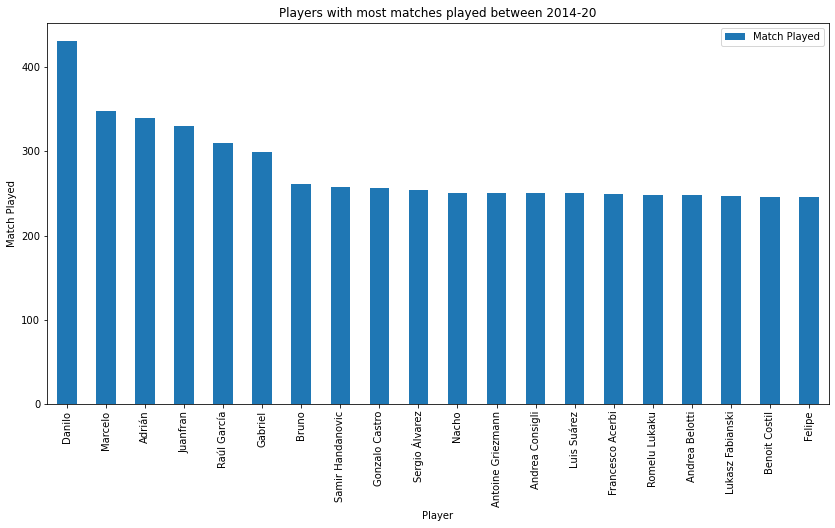

In [39]:
match_played.sort_values(by='Match Played',ascending=False).head(20).plot('Player','Match Played',kind='bar',figsize=(14,7))
plt.title('Players with most matches played between 2014-20')
plt.ylabel('Match Played')

#### Own Goals

In [40]:
own_goals=appearances.groupby('Player').sum()['ownGoals'].reset_index()
own_goals=own_goals.rename(columns={'ownGoals':'Own Goals'})
own_goals

,Player,Own Goals
0,Aaron Connolly,0
1,Aaron Cresswell,0
2,Aaron Hickey,0
3,Aaron Hunt,1
4,Aaron Lennon,0
...,...,...
6379,Óscar Romero,0
6380,Óscar Trejo,0
6381,Ömer Toprak,1
6382,Özkan Yildirim,0


#### Key Passes

In [41]:
key_passes=appearances.groupby('Player').sum()['keyPasses'].reset_index()
key_passes=key_passes.rename(columns={'keyPasses':'Key Passes'})
key_passes

,Player,Key Passes
0,Aaron Connolly,12
1,Aaron Cresswell,227
2,Aaron Hickey,2
3,Aaron Hunt,140
4,Aaron Lennon,73
...,...,...
6379,Óscar Romero,20
6380,Óscar Trejo,168
6381,Ömer Toprak,23
6382,Özkan Yildirim,0


#### xAssists

In [42]:
xA=appearances.groupby('Player').sum()['xAssists'].reset_index()
xA

,Player,xAssists
0,Aaron Connolly,0.722801
1,Aaron Cresswell,25.165481
2,Aaron Hickey,0.046802
3,Aaron Hunt,9.489843
4,Aaron Lennon,6.998873
...,...,...
6379,Óscar Romero,1.302394
6380,Óscar Trejo,18.027220
6381,Ömer Toprak,2.623155
6382,Özkan Yildirim,0.000000


#### xGoals Buildup

In [43]:
goal_buildup=appearances.groupby('Player').sum()['xGoalsBuildup'].reset_index()
goal_buildup=goal_buildup.rename(columns={'xGoalsBuildup':'XGoalBuildup'})
goal_buildup=goal_buildup.sort_values(by='XGoalBuildup',ascending=False)
goal_buildup

,Player,XGoalBuildup
5503,Sergio Busquets,145.840174
3870,Marcelo,119.688679
3539,Lionel Messi,119.294823
2990,Jordi Alba,118.709531
1253,Danilo,108.413267
...,...,...
2293,Guus Til,0.000000
1068,Chuba Akpom,0.000000
1066,Christopher Scott,0.000000
5282,Rushian Hepburn-Murphy,0.000000


Text(0, 0.5, 'xGoal Buildup')

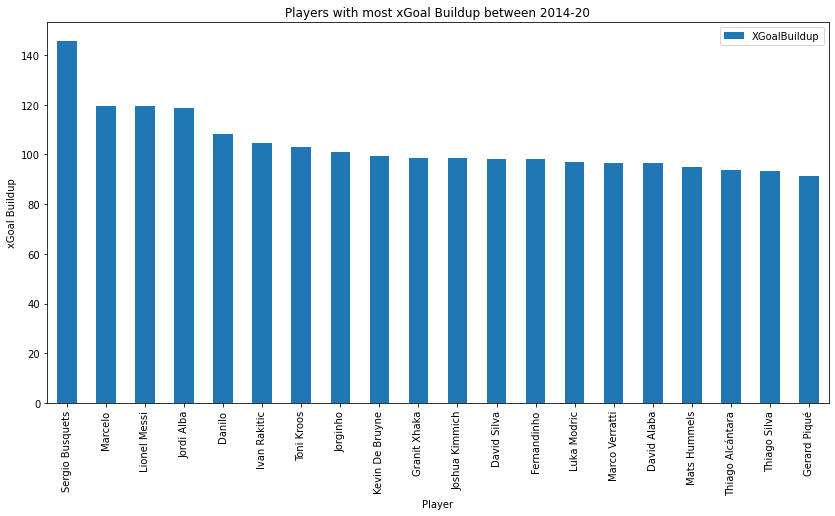

In [44]:
goal_buildup.head(20).plot('Player','XGoalBuildup',kind='bar',figsize=(14,7))
plt.title('Players with most xGoal Buildup between 2014-20')
plt.ylabel('xGoal Buildup')

#### Yellow Card

In [45]:
yellow_cards=appearances.groupby('Player').sum()['yellowCard'].reset_index()
yellow_cards=yellow_cards.rename(columns={'yellowCard':'Yellow Card'})
yellow_cards

,Player,Yellow Card
0,Aaron Connolly,0
1,Aaron Cresswell,26
2,Aaron Hickey,3
3,Aaron Hunt,7
4,Aaron Lennon,11
...,...,...
6379,Óscar Romero,3
6380,Óscar Trejo,19
6381,Ömer Toprak,22
6382,Özkan Yildirim,0


#### Red card

In [46]:
red_cards=appearances.groupby('Player').sum()['redCard'].reset_index()
red_cards=red_cards.rename(columns={'redCard':'Red Card'})
red_cards

,Player,Red Card
0,Aaron Connolly,0
1,Aaron Cresswell,1
2,Aaron Hickey,1
3,Aaron Hunt,0
4,Aaron Lennon,0
...,...,...
6379,Óscar Romero,0
6380,Óscar Trejo,2
6381,Ömer Toprak,0
6382,Özkan Yildirim,0


#### Minutes Played

In [47]:
mins_played=appearances.groupby('Player').sum()['time'].reset_index()
mins_played=mins_played.rename(columns={'time':'Mins Played'})
mins_played

,Player,Mins Played
0,Aaron Connolly,2078
1,Aaron Cresswell,19445
2,Aaron Hickey,766
3,Aaron Hunt,5630
4,Aaron Lennon,7012
...,...,...
6379,Óscar Romero,765
6380,Óscar Trejo,8439
6381,Ömer Toprak,10941
6382,Özkan Yildirim,73


Text(0, 0.5, 'Mins Played')

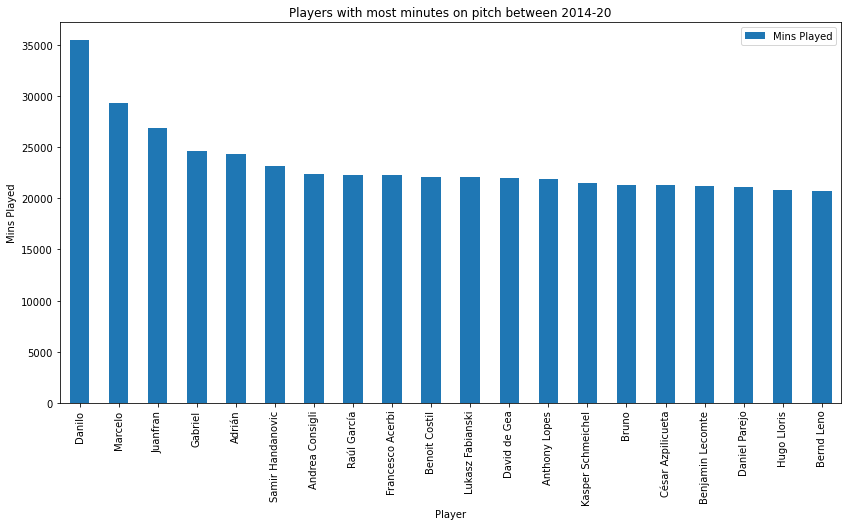

In [48]:
mins_played.sort_values(by='Mins Played',ascending=False).head(20).plot('Player','Mins Played',kind='bar',figsize=(14,7))
plt.title('Players with most minutes on pitch between 2014-20')
plt.ylabel('Mins Played')

## Player Statistics

In [49]:
player_stats=pd.merge(players,Shot,on='Player', how='left')

In [50]:
player_stats

,playerID,Player,Shots
0,560,Sergio Romero,NaN
1,557,Matteo Darmian,57.0
2,548,Daley Blind,44.0
3,628,Chris Smalling,94.0
4,1006,Luke Shaw,65.0
...,...,...,...
7654,9512,Valentino Livramento,NaN
7655,9740,José Sá,NaN
7656,1025,Daniel Bachmann,NaN
7657,9745,Dimitris Giannoulis,NaN


In [51]:
player_stats=player_stats.merge(Goals_Scored,on='Player',how='left').merge(xG,on='Player',how='left').merge(Assist,on='Player',how='left')

In [52]:
player_stats=player_stats.drop('playerID',axis=1)

In [53]:
player_stats

,Player,Shots,Goals,xGoal,Assists
0,Sergio Romero,NaN,NaN,NaN,NaN
1,Matteo Darmian,57.0,7.0,5.006452,5.0
2,Daley Blind,44.0,4.0,1.701685,5.0
3,Chris Smalling,94.0,13.0,9.680089,5.0
4,Luke Shaw,65.0,2.0,3.675252,11.0
...,...,...,...,...,...
7654,Valentino Livramento,NaN,NaN,NaN,NaN
7655,José Sá,NaN,NaN,NaN,NaN
7656,Daniel Bachmann,NaN,NaN,NaN,NaN
7657,Dimitris Giannoulis,NaN,NaN,NaN,NaN


In [54]:
player_stats=player_stats.merge(Penalty_Goals,on='Player',how='left').merge(Freekick_Goals,on='Player',how='left').merge(Openplay_goals,on='Player',how='left')

In [55]:
player_stats

,Player,Shots,Goals,xGoal,Assists,Penalty Goals,Freekick Goals,Openplay goals
0,Sergio Romero,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Matteo Darmian,57.0,7.0,5.006452,5.0,NaN,NaN,6.0
2,Daley Blind,44.0,4.0,1.701685,5.0,NaN,NaN,2.0
3,Chris Smalling,94.0,13.0,9.680089,5.0,NaN,NaN,NaN
4,Luke Shaw,65.0,2.0,3.675252,11.0,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...
7654,Valentino Livramento,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7655,José Sá,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7656,Daniel Bachmann,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7657,Dimitris Giannoulis,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
player_stats=player_stats.merge(own_goals,on='Player',how='left').merge(key_passes,on='Player',how='left').merge(xA,on='Player',how='left')

In [57]:
player_stats

,Player,Shots,Goals,xGoal,Assists,Penalty Goals,Freekick Goals,Openplay goals,Own Goals,Key Passes,xAssists
0,Sergio Romero,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.000000
1,Matteo Darmian,57.0,7.0,5.006452,5.0,NaN,NaN,6.0,0.0,80.0,7.595861
2,Daley Blind,44.0,4.0,1.701685,5.0,NaN,NaN,2.0,0.0,73.0,5.784521
3,Chris Smalling,94.0,13.0,9.680089,5.0,NaN,NaN,NaN,2.0,30.0,3.524004
4,Luke Shaw,65.0,2.0,3.675252,11.0,NaN,NaN,2.0,1.0,161.0,15.496242
...,...,...,...,...,...,...,...,...,...,...,...
7654,Valentino Livramento,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7655,José Sá,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7656,Daniel Bachmann,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7657,Dimitris Giannoulis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
player_stats=player_stats.merge(yellow_cards,on='Player',how='left').merge(red_cards,on='Player',how='left').merge(mins_played,on='Player',how='left').merge(goal_buildup,on='Player',how='left').merge(match_played,on='Player',how='left')
player_stats

,Player,Shots,Goals,xGoal,Assists,Penalty Goals,Freekick Goals,Openplay goals,Own Goals,Key Passes,xAssists,Yellow Card,Red Card,Mins Played,XGoalBuildup,Match Played
0,Sergio Romero,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.000000,1.0,0.0,1509.0,1.755427,17.0
1,Matteo Darmian,57.0,7.0,5.006452,5.0,NaN,NaN,6.0,0.0,80.0,7.595861,24.0,0.0,10778.0,23.330969,155.0
2,Daley Blind,44.0,4.0,1.701685,5.0,NaN,NaN,2.0,0.0,73.0,5.784521,8.0,0.0,7485.0,22.083364,90.0
3,Chris Smalling,94.0,13.0,9.680089,5.0,NaN,NaN,NaN,2.0,30.0,3.524004,19.0,1.0,14570.0,35.032110,177.0
4,Luke Shaw,65.0,2.0,3.675252,11.0,NaN,NaN,2.0,1.0,161.0,15.496242,31.0,1.0,10056.0,36.908527,128.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7654,Valentino Livramento,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7655,José Sá,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7656,Daniel Bachmann,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7657,Dimitris Giannoulis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
## Replacing all NaN values by 0
player_stats.fillna(value=0,inplace=True)
player_stats

,Player,Shots,Goals,xGoal,Assists,Penalty Goals,Freekick Goals,Openplay goals,Own Goals,Key Passes,xAssists,Yellow Card,Red Card,Mins Played,XGoalBuildup,Match Played
0,Sergio Romero,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,1509.0,1.755427,17.0
1,Matteo Darmian,57.0,7.0,5.006452,5.0,0.0,0.0,6.0,0.0,80.0,7.595861,24.0,0.0,10778.0,23.330969,155.0
2,Daley Blind,44.0,4.0,1.701685,5.0,0.0,0.0,2.0,0.0,73.0,5.784521,8.0,0.0,7485.0,22.083364,90.0
3,Chris Smalling,94.0,13.0,9.680089,5.0,0.0,0.0,0.0,2.0,30.0,3.524004,19.0,1.0,14570.0,35.032110,177.0
4,Luke Shaw,65.0,2.0,3.675252,11.0,0.0,0.0,2.0,1.0,161.0,15.496242,31.0,1.0,10056.0,36.908527,128.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7654,Valentino Livramento,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
7655,José Sá,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
7656,Daniel Bachmann,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
7657,Dimitris Giannoulis,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0


In [60]:
duplicates = player_stats[player_stats.duplicated()]
duplicates

,Player,Shots,Goals,xGoal,Assists,Penalty Goals,Freekick Goals,Openplay goals,Own Goals,Key Passes,xAssists,Yellow Card,Red Card,Mins Played,XGoalBuildup,Match Played
784,Fernando,98.0,13.0,11.878824,20.0,0.0,1.0,6.0,0.0,111.0,9.583215,46.0,0.0,12318.0,40.487285,164.0
1188,Gabriel,139.0,11.0,10.853581,16.0,0.0,0.0,1.0,2.0,36.0,2.301427,51.0,3.0,24652.0,58.393399,299.0
1325,Gabriel,139.0,11.0,10.853581,16.0,0.0,0.0,1.0,2.0,36.0,2.301427,51.0,3.0,24652.0,58.393399,299.0
1635,Felipe,126.0,10.0,16.200455,12.0,0.0,0.0,1.0,2.0,39.0,3.957961,67.0,5.0,18429.0,24.800753,246.0
1744,Bruno Henrique,31.0,1.0,2.129867,8.0,0.0,0.0,1.0,0.0,37.0,3.531925,8.0,0.0,2643.0,3.869300,47.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6979,Aleksandr Rudenko,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
7074,Juan Cruz,1.0,0.0,0.041234,0.0,0.0,0.0,0.0,0.0,11.0,0.332120,4.0,0.0,1978.0,2.211905,27.0
7089,Sergio Arribas,1.0,0.0,0.027904,0.0,0.0,0.0,0.0,0.0,1.0,0.050785,1.0,0.0,145.0,1.153445,9.0
7320,Luis Suárez,811.0,176.0,165.346875,146.0,12.0,2.0,146.0,0.0,347.0,63.912389,48.0,0.0,20132.0,52.954843,250.0


In [61]:
player_stats=player_stats.drop_duplicates()
player_stats

,Player,Shots,Goals,xGoal,Assists,Penalty Goals,Freekick Goals,Openplay goals,Own Goals,Key Passes,xAssists,Yellow Card,Red Card,Mins Played,XGoalBuildup,Match Played
0,Sergio Romero,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,1509.0,1.755427,17.0
1,Matteo Darmian,57.0,7.0,5.006452,5.0,0.0,0.0,6.0,0.0,80.0,7.595861,24.0,0.0,10778.0,23.330969,155.0
2,Daley Blind,44.0,4.0,1.701685,5.0,0.0,0.0,2.0,0.0,73.0,5.784521,8.0,0.0,7485.0,22.083364,90.0
3,Chris Smalling,94.0,13.0,9.680089,5.0,0.0,0.0,0.0,2.0,30.0,3.524004,19.0,1.0,14570.0,35.032110,177.0
4,Luke Shaw,65.0,2.0,3.675252,11.0,0.0,0.0,2.0,1.0,161.0,15.496242,31.0,1.0,10056.0,36.908527,128.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7654,Valentino Livramento,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
7655,José Sá,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
7656,Daniel Bachmann,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
7657,Dimitris Giannoulis,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0


In [62]:
player_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7576 entries, 0 to 7658
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Player          7576 non-null   object 
 1   Shots           7576 non-null   float64
 2   Goals           7576 non-null   float64
 3   xGoal           7576 non-null   float64
 4   Assists         7576 non-null   float64
 5   Penalty Goals   7576 non-null   float64
 6   Freekick Goals  7576 non-null   float64
 7   Openplay goals  7576 non-null   float64
 8   Own Goals       7576 non-null   float64
 9   Key Passes      7576 non-null   float64
 10  xAssists        7576 non-null   float64
 11  Yellow Card     7576 non-null   float64
 12  Red Card        7576 non-null   float64
 13  Mins Played     7576 non-null   float64
 14  XGoalBuildup    7576 non-null   float64
 15  Match Played    7576 non-null   float64
dtypes: float64(15), object(1)
memory usage: 1006.2+ KB


In [63]:
def Individual_Player_Stats(name):
    result = player_stats.loc[player_stats['Player']==name]
    return result

In [64]:
player_name = input("Enter Player's Name : ")
Result=Individual_Player_Stats(player_name)
Result

Enter Player's Name : Luke Shaw


,Player,Shots,Goals,xGoal,Assists,Penalty Goals,Freekick Goals,Openplay goals,Own Goals,Key Passes,xAssists,Yellow Card,Red Card,Mins Played,XGoalBuildup,Match Played
4,Luke Shaw,65.0,2.0,3.675252,11.0,0.0,0.0,2.0,1.0,161.0,15.496242,31.0,1.0,10056.0,36.908527,128.0


In [65]:
def Particular_Stat(name):
    result = player_stats[['Player',name]]
    return result

In [66]:
stat_name = input("Enter the Stat : ")
Result=Particular_Stat(stat_name)
Result

Enter the Stat : Goals


,Player,Goals
0,Sergio Romero,0.0
1,Matteo Darmian,7.0
2,Daley Blind,4.0
3,Chris Smalling,13.0
4,Luke Shaw,2.0
...,...,...
7654,Valentino Livramento,0.0
7655,José Sá,0.0
7656,Daniel Bachmann,0.0
7657,Dimitris Giannoulis,0.0


In [67]:
#### Particular player's particular stat

In [68]:
def fun(player,stat):
    result = player_stats.loc[player_stats['Player']==player][stat]
    return result

In [69]:
player_ = input("Enter Player's Name : ")
stat = input("Enter the Stat : ")
Result=fun(player_,stat)
Result

Enter Player's Name : Marcelo
Enter the Stat : Goals


1492    20.0
Name: Goals, dtype: float64

# Teams

In [70]:
league

,leagueID,name,understatNotation
0,1,Premier League,EPL
1,2,Serie A,Serie_A
2,3,Bundesliga,Bundesliga
3,4,La Liga,La_liga
4,5,Ligue 1,Ligue_1


In [71]:
team

,teamID,name
0,71,Aston Villa
1,72,Everton
2,74,Southampton
3,75,Leicester
4,76,West Bromwich Albion
...,...,...
141,182,Nancy
142,224,Amiens
143,225,Strasbourg
144,235,Nimes


In [72]:
games=games.merge(league,on='leagueID',how='left')

In [73]:
games=games.rename({'name':'League'},axis=1)
games=games.drop(['understatNotation','leagueID'],axis=1)
games

,gameID,season,date,homeTeamID,awayTeamID,homeGoals,awayGoals,homeProbability,drawProbability,awayProbability,...,WHH,WHD,WHA,VCH,VCD,VCA,PSCH,PSCD,PSCA,League
0,81,2015,2015-08-08 15:45:00,89,82,1,0,0.2843,0.3999,0.3158,...,1.62,3.60,6.00,1.67,4.00,5.75,1.64,4.07,6.04,Premier League
1,82,2015,2015-08-08 18:00:00,73,71,0,1,0.3574,0.3500,0.2926,...,1.91,3.50,4.00,2.00,3.50,4.20,1.82,3.88,4.70,Premier League
2,83,2015,2015-08-08 18:00:00,72,90,2,2,0.2988,0.4337,0.2675,...,1.73,3.50,5.00,1.73,3.90,5.40,1.75,3.76,5.44,Premier League
3,84,2015,2015-08-08 18:00:00,75,77,4,2,0.6422,0.2057,0.1521,...,2.00,3.10,2.70,2.00,3.40,4.33,1.79,3.74,5.10,Premier League
4,85,2015,2015-08-08 18:00:00,79,78,1,3,0.1461,0.2159,0.6380,...,2.60,3.10,2.88,2.60,3.25,3.00,2.46,3.39,3.14,Premier League
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12675,16131,2020,2021-05-23 19:00:00,168,166,1,2,0.2812,0.2671,0.4517,...,1.50,4.50,6.00,1.50,4.33,6.00,1.58,4.36,6.18,Ligue 1
12676,16132,2020,2021-05-23 19:00:00,177,176,1,2,0.3367,0.2999,0.3634,...,2.50,2.90,3.20,2.40,3.10,3.00,2.66,3.28,2.93,Ligue 1
12677,16133,2020,2021-05-23 19:00:00,163,235,2,0,0.6719,0.2502,0.0779,...,1.32,5.25,9.00,1.30,5.25,9.00,1.23,6.85,12.59,Ligue 1
12678,16134,2020,2021-05-23 19:00:00,175,181,0,1,0.3541,0.3010,0.3449,...,1.29,5.25,11.00,1.29,5.25,9.50,1.29,5.97,10.80,Ligue 1


In [74]:
games=games.rename({'homeTeamID':'teamID'},axis=1)
games=games.merge(team,on='teamID',how='left')
games.drop('teamID',axis=1,inplace=True)
games=games.rename({'name':'Home Team'},axis=1)
games

,gameID,season,date,awayTeamID,homeGoals,awayGoals,homeProbability,drawProbability,awayProbability,homeGoalsHalfTime,...,WHD,WHA,VCH,VCD,VCA,PSCH,PSCD,PSCA,League,Home Team
0,81,2015,2015-08-08 15:45:00,82,1,0,0.2843,0.3999,0.3158,1,...,3.60,6.00,1.67,4.00,5.75,1.64,4.07,6.04,Premier League,Manchester United
1,82,2015,2015-08-08 18:00:00,71,0,1,0.3574,0.3500,0.2926,0,...,3.50,4.00,2.00,3.50,4.20,1.82,3.88,4.70,Premier League,Bournemouth
2,83,2015,2015-08-08 18:00:00,90,2,2,0.2988,0.4337,0.2675,0,...,3.50,5.00,1.73,3.90,5.40,1.75,3.76,5.44,Premier League,Everton
3,84,2015,2015-08-08 18:00:00,77,4,2,0.6422,0.2057,0.1521,3,...,3.10,2.70,2.00,3.40,4.33,1.79,3.74,5.10,Premier League,Leicester
4,85,2015,2015-08-08 18:00:00,78,1,3,0.1461,0.2159,0.6380,0,...,3.10,2.88,2.60,3.25,3.00,2.46,3.39,3.14,Premier League,Norwich
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12675,16131,2020,2021-05-23 19:00:00,166,1,2,0.2812,0.2671,0.4517,1,...,4.50,6.00,1.50,4.33,6.00,1.58,4.36,6.18,Ligue 1,Nantes
12676,16132,2020,2021-05-23 19:00:00,176,1,2,0.3367,0.2999,0.3634,1,...,2.90,3.20,2.40,3.10,3.00,2.66,3.28,2.93,Ligue 1,Reims
12677,16133,2020,2021-05-23 19:00:00,235,2,0,0.6719,0.2502,0.0779,1,...,5.25,9.00,1.30,5.25,9.00,1.23,6.85,12.59,Ligue 1,Rennes
12678,16134,2020,2021-05-23 19:00:00,181,0,1,0.3541,0.3010,0.3449,0,...,5.25,11.00,1.29,5.25,9.50,1.29,5.97,10.80,Ligue 1,Saint-Etienne


In [75]:
games=games.rename({'awayTeamID':'teamID'},axis=1)
games=games.merge(team,on='teamID',how='left')
games=games.rename({'name':'Away Team'},axis=1)
games.drop('teamID',axis=1,inplace=True)
games

,gameID,season,date,homeGoals,awayGoals,homeProbability,drawProbability,awayProbability,homeGoalsHalfTime,awayGoalsHalfTime,...,WHA,VCH,VCD,VCA,PSCH,PSCD,PSCA,League,Home Team,Away Team
0,81,2015,2015-08-08 15:45:00,1,0,0.2843,0.3999,0.3158,1,0,...,6.00,1.67,4.00,5.75,1.64,4.07,6.04,Premier League,Manchester United,Tottenham
1,82,2015,2015-08-08 18:00:00,0,1,0.3574,0.3500,0.2926,0,0,...,4.00,2.00,3.50,4.20,1.82,3.88,4.70,Premier League,Bournemouth,Aston Villa
2,83,2015,2015-08-08 18:00:00,2,2,0.2988,0.4337,0.2675,0,1,...,5.00,1.73,3.90,5.40,1.75,3.76,5.44,Premier League,Everton,Watford
3,84,2015,2015-08-08 18:00:00,4,2,0.6422,0.2057,0.1521,3,0,...,2.70,2.00,3.40,4.33,1.79,3.74,5.10,Premier League,Leicester,Sunderland
4,85,2015,2015-08-08 18:00:00,1,3,0.1461,0.2159,0.6380,0,1,...,2.88,2.60,3.25,3.00,2.46,3.39,3.14,Premier League,Norwich,Crystal Palace
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12675,16131,2020,2021-05-23 19:00:00,1,2,0.2812,0.2671,0.4517,1,1,...,6.00,1.50,4.33,6.00,1.58,4.36,6.18,Ligue 1,Nantes,Montpellier
12676,16132,2020,2021-05-23 19:00:00,1,2,0.3367,0.2999,0.3634,1,1,...,3.20,2.40,3.10,3.00,2.66,3.28,2.93,Ligue 1,Reims,Bordeaux
12677,16133,2020,2021-05-23 19:00:00,2,0,0.6719,0.2502,0.0779,1,0,...,9.00,1.30,5.25,9.00,1.23,6.85,12.59,Ligue 1,Rennes,Nimes
12678,16134,2020,2021-05-23 19:00:00,0,1,0.3541,0.3010,0.3449,0,1,...,11.00,1.29,5.25,9.50,1.29,5.97,10.80,Ligue 1,Saint-Etienne,Dijon


In [76]:
teamstats=pd.read_csv('teamstats.csv')
teamstats

,gameID,teamID,season,date,location,goals,xGoals,shots,shotsOnTarget,deep,ppda,fouls,corners,yellowCards,redCards,result
0,81,89,2015,2015-08-08 15:45:00,h,1,0.627539,9,1,4,13.8261,12,1,2.0,0,W
1,81,82,2015,2015-08-08 15:45:00,a,0,0.674600,9,4,10,8.2188,12,2,3.0,0,L
2,82,73,2015,2015-08-08 18:00:00,h,0,0.876106,11,2,11,6.9000,13,6,3.0,0,L
3,82,71,2015,2015-08-08 18:00:00,a,1,0.782253,7,3,2,11.8462,13,3,4.0,0,W
4,83,72,2015,2015-08-08 18:00:00,h,2,0.604226,10,5,5,6.6500,7,8,1.0,0,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25355,16133,235,2020,2021-05-23 19:00:00,a,0,0.357583,9,2,0,39.7273,10,3,0.0,0,L
25356,16134,175,2020,2021-05-23 19:00:00,h,0,1.460500,19,5,6,7.5600,13,9,1.0,0,L
25357,16134,181,2020,2021-05-23 19:00:00,a,1,1.380290,10,2,3,14.7200,10,3,0.0,0,W
25358,16135,225,2020,2021-05-23 19:00:00,h,1,0.323960,6,2,1,15.1000,17,2,1.0,0,D


In [77]:
teamstats=teamstats.merge(team,on='teamID',how='left')

In [78]:
teamstats=teamstats.rename(columns={'name':'Club'})
teamstats.drop('teamID',axis=1,inplace=True)
teamstats

,gameID,season,date,location,goals,xGoals,shots,shotsOnTarget,deep,ppda,fouls,corners,yellowCards,redCards,result,Club
0,81,2015,2015-08-08 15:45:00,h,1,0.627539,9,1,4,13.8261,12,1,2.0,0,W,Manchester United
1,81,2015,2015-08-08 15:45:00,a,0,0.674600,9,4,10,8.2188,12,2,3.0,0,L,Tottenham
2,82,2015,2015-08-08 18:00:00,h,0,0.876106,11,2,11,6.9000,13,6,3.0,0,L,Bournemouth
3,82,2015,2015-08-08 18:00:00,a,1,0.782253,7,3,2,11.8462,13,3,4.0,0,W,Aston Villa
4,83,2015,2015-08-08 18:00:00,h,2,0.604226,10,5,5,6.6500,7,8,1.0,0,D,Everton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25355,16133,2020,2021-05-23 19:00:00,a,0,0.357583,9,2,0,39.7273,10,3,0.0,0,L,Nimes
25356,16134,2020,2021-05-23 19:00:00,h,0,1.460500,19,5,6,7.5600,13,9,1.0,0,L,Saint-Etienne
25357,16134,2020,2021-05-23 19:00:00,a,1,1.380290,10,2,3,14.7200,10,3,0.0,0,W,Dijon
25358,16135,2020,2021-05-23 19:00:00,h,1,0.323960,6,2,1,15.1000,17,2,1.0,0,D,Strasbourg


#### Wins

In [79]:
Wins=teamstats[['result','Club']].value_counts()['W'].reset_index()
Wins.columns=['Club','Wins']
Wins

,Club,Wins
0,Juventus,191
1,Barcelona,190
2,Paris Saint Germain,187
3,Manchester City,183
4,Real Madrid,181
...,...,...
141,Middlesbrough,5
142,Cesena,4
143,Cordoba,3
144,Nuernberg,3


#### Loss

In [80]:
Losses=teamstats[['result','Club']].value_counts()['L'].reset_index()
Losses.columns=['Club','Losses']
Losses

,Club,Losses
0,Udinese,127
1,Crystal Palace,123
2,Genoa,119
3,Eibar,118
4,Cagliari,111
...,...,...
141,Spezia,17
142,Arminia Bielefeld,17
143,GFC Ajaccio,17
144,Cadiz,16


#### Draw

In [81]:
Draws=teamstats[['result','Club']].value_counts()['D'].reset_index()
Draws.columns=['Club','Draws']
Draws

,Club,Draws
0,Torino,88
1,Fiorentina,84
2,Sassuolo,79
3,Atalanta,76
4,Valencia,76
...,...,...
141,Queens Park Rangers,6
142,Mallorca,6
143,Leeds,5
144,Cardiff,4


#### Home Wins

In [82]:
Home_Wins=teamstats[['result','location','Club']].value_counts()['W','h'].reset_index()
Home_Wins.columns=['Club','Home Wins']
Home_Wins

C:\Users\jsubh\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2901: PerformanceWarning: indexing past lexsort depth may impact performance.
  result = self._run_cell(


,Club,Home Wins
0,Juventus,111
1,Barcelona,105
2,Paris Saint Germain,102
3,Manchester City,99
4,Real Madrid,99
...,...,...
141,Cesena,3
142,Brescia,3
143,Nuernberg,3
144,Pescara,2


#### Away Wins

In [83]:
Away_Wins=teamstats[['result','location','Club']].value_counts()['W','a'].reset_index()
Away_Wins.columns=['Club','Away Wins']
Away_Wins

C:\Users\jsubh\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2901: PerformanceWarning: indexing past lexsort depth may impact performance.
  result = self._run_cell(


,Club,Away Wins
0,Paris Saint Germain,85
1,Barcelona,85
2,Bayern Munich,84
3,Manchester City,84
4,Real Madrid,82
...,...,...
139,Nancy,2
140,Queens Park Rangers,2
141,Mallorca,1
142,Cesena,1


#### Total Goals scored by the team

In [84]:
Team_Goals_scored=teamstats.groupby('Club').sum()['goals'].reset_index()
Team_Goals_scored.columns=['Club','Goals Scored']
Team_Goals_scored

,Club,Goals Scored
0,AC Milan,410
1,Alaves,190
2,Almeria,35
3,Amiens,99
4,Angers,234
...,...,...
141,Werder Bremen,334
142,West Bromwich Albion,181
143,West Ham,367
144,Wolfsburg,360


#### Team xG

In [85]:
Team_xG=teamstats.groupby('Club').sum()['xGoals'].reset_index()
Team_xG.columns=['Club','xG']
Team_xG

,Club,xG
0,AC Milan,404.006172
1,Alaves,198.614187
2,Almeria,38.669944
3,Amiens,91.716095
4,Angers,243.448559
...,...,...
141,Werder Bremen,293.907393
142,West Bromwich Albion,186.749909
143,West Ham,343.502599
144,Wolfsburg,339.927336


#### Cards and Fouls

In [86]:
Team_yellowcard=teamstats.groupby('Club').sum()['yellowCards'].reset_index()
Team_yellowcard.columns=['Club','Yellow Card']
Team_yellowcard

,Club,Yellow Card
0,AC Milan,596.0
1,Alaves,529.0
2,Almeria,105.0
3,Amiens,196.0
4,Angers,357.0
...,...,...
141,Werder Bremen,477.0
142,West Bromwich Albion,330.0
143,West Ham,438.0
144,Wolfsburg,417.0


In [87]:
Team_redcard=teamstats.groupby('Club').sum()['redCards'].reset_index()
Team_redcard.columns=['Club','Red Card']
Team_redcard

,Club,Red Card
0,AC Milan,50
1,Alaves,25
2,Almeria,11
3,Amiens,14
4,Angers,22
...,...,...
141,Werder Bremen,16
142,West Bromwich Albion,11
143,West Ham,19
144,Wolfsburg,20


In [88]:
fouls=teamstats.groupby('Club').sum()['fouls'].reset_index()
fouls.columns=['Club','Fouls']
fouls

,Club,Fouls
0,AC Milan,3643
1,Alaves,2824
2,Almeria,562
3,Amiens,1424
4,Angers,2684
...,...,...
141,Werder Bremen,3328
142,West Bromwich Albion,2108
143,West Ham,2680
144,Wolfsburg,3095


#### Shots and Corners

In [89]:
Team_totalshots=teamstats.groupby('Club').sum()['shots'].reset_index()
Team_totalshots.columns=['Club','Total Shots']
Team_totalshots

,Club,Total Shots
0,AC Milan,3926
1,Alaves,1874
2,Almeria,394
3,Amiens,982
4,Angers,2605
...,...,...
141,Werder Bremen,2938
142,West Bromwich Albion,1909
143,West Ham,3247
144,Wolfsburg,3169


In [90]:
Team_corners=teamstats.groupby('Club').sum()['corners'].reset_index()
Team_corners.columns=['Club','Corners']
Team_corners

,Club,Corners
0,AC Milan,1562
1,Alaves,700
2,Almeria,191
3,Amiens,384
4,Angers,978
...,...,...
141,Werder Bremen,1054
142,West Bromwich Albion,838
143,West Ham,1343
144,Wolfsburg,1169


#### Pass Per Defensive Action(PPDA )
#### PPDA = Number of Passes made by Attacking Team (opponent) / Number of Defensive Actions

In [91]:
Team_ppda=teamstats.groupby('Club').mean()['ppda'].reset_index()
Team_ppda.columns=['Club','PPDA']
Team_ppda

,Club,PPDA
0,AC Milan,10.129139
1,Alaves,12.093852
2,Almeria,8.761426
3,Amiens,11.715386
4,Angers,15.606867
...,...,...
141,Werder Bremen,12.327063
142,West Bromwich Albion,14.879778
143,West Ham,13.171824
144,Wolfsburg,10.951384


#### Total matches

In [92]:
Team_totalmatches=teamstats['Club'].value_counts().reset_index()
Team_totalmatches.columns=['Club','Games played']
Team_totalmatches

,Club,Games played
0,Manchester United,266
1,Napoli,266
2,Roma,266
3,Lazio,266
4,Juventus,266
...,...,...
141,Nancy,38
142,Pescara,38
143,GFC Ajaccio,38
144,Nuernberg,34


In [93]:
games

,gameID,season,date,homeGoals,awayGoals,homeProbability,drawProbability,awayProbability,homeGoalsHalfTime,awayGoalsHalfTime,...,WHA,VCH,VCD,VCA,PSCH,PSCD,PSCA,League,Home Team,Away Team
0,81,2015,2015-08-08 15:45:00,1,0,0.2843,0.3999,0.3158,1,0,...,6.00,1.67,4.00,5.75,1.64,4.07,6.04,Premier League,Manchester United,Tottenham
1,82,2015,2015-08-08 18:00:00,0,1,0.3574,0.3500,0.2926,0,0,...,4.00,2.00,3.50,4.20,1.82,3.88,4.70,Premier League,Bournemouth,Aston Villa
2,83,2015,2015-08-08 18:00:00,2,2,0.2988,0.4337,0.2675,0,1,...,5.00,1.73,3.90,5.40,1.75,3.76,5.44,Premier League,Everton,Watford
3,84,2015,2015-08-08 18:00:00,4,2,0.6422,0.2057,0.1521,3,0,...,2.70,2.00,3.40,4.33,1.79,3.74,5.10,Premier League,Leicester,Sunderland
4,85,2015,2015-08-08 18:00:00,1,3,0.1461,0.2159,0.6380,0,1,...,2.88,2.60,3.25,3.00,2.46,3.39,3.14,Premier League,Norwich,Crystal Palace
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12675,16131,2020,2021-05-23 19:00:00,1,2,0.2812,0.2671,0.4517,1,1,...,6.00,1.50,4.33,6.00,1.58,4.36,6.18,Ligue 1,Nantes,Montpellier
12676,16132,2020,2021-05-23 19:00:00,1,2,0.3367,0.2999,0.3634,1,1,...,3.20,2.40,3.10,3.00,2.66,3.28,2.93,Ligue 1,Reims,Bordeaux
12677,16133,2020,2021-05-23 19:00:00,2,0,0.6719,0.2502,0.0779,1,0,...,9.00,1.30,5.25,9.00,1.23,6.85,12.59,Ligue 1,Rennes,Nimes
12678,16134,2020,2021-05-23 19:00:00,0,1,0.3541,0.3010,0.3449,0,1,...,11.00,1.29,5.25,9.50,1.29,5.97,10.80,Ligue 1,Saint-Etienne,Dijon


In [94]:
games.columns

Index(['gameID', 'season', 'date', 'homeGoals', 'awayGoals', 'homeProbability',
       'drawProbability', 'awayProbability', 'homeGoalsHalfTime',
       'awayGoalsHalfTime', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA',
       'IWH', 'IWD', 'IWA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'VCH',
       'VCD', 'VCA', 'PSCH', 'PSCD', 'PSCA', 'League', 'Home Team',
       'Away Team'],
      dtype='object')

#### Home and Away Goals

In [95]:
Home_Goals=games.groupby('Home Team').sum()['homeGoals'].reset_index()
Home_Goals.columns=['Club','Home Goals']
Home_Goals

,Club,Home Goals
0,AC Milan,208
1,Alaves,100
2,Almeria,20
3,Amiens,63
4,Angers,130
...,...,...
141,Werder Bremen,166
142,West Bromwich Albion,107
143,West Ham,196
144,Wolfsburg,195


In [96]:
Away_Goals=games.groupby('Away Team').sum()['awayGoals'].reset_index()
Away_Goals.columns=['Club','Away Goals']
Away_Goals

,Club,Away Goals
0,AC Milan,202
1,Alaves,90
2,Almeria,15
3,Amiens,36
4,Angers,104
...,...,...
141,Werder Bremen,168
142,West Bromwich Albion,74
143,West Ham,171
144,Wolfsburg,165


## Team Statistics

In [97]:
Club_stats=pd.merge(Team_totalmatches,Wins,on='Club')
Club_stats

,Club,Games played,Wins
0,Manchester United,266,140
1,Napoli,266,163
2,Roma,266,150
3,Lazio,266,140
4,Juventus,266,191
...,...,...,...
141,Nancy,38,9
142,Pescara,38,2
143,GFC Ajaccio,38,8
144,Nuernberg,34,3


In [98]:
Club_stats=Club_stats.merge(Losses,on='Club',how='left').merge(Draws,on='Club',how='left').merge(Home_Wins,on='Club',how='left').merge(Away_Wins,on='Club',how='left').merge(Team_Goals_scored,on='Club',how='left').merge(Team_xG,on='Club',how='left').merge(Home_Goals,on='Club',how='left').merge(Away_Goals,on='Club',how='left')

In [99]:
Club_stats

,Club,Games played,Wins,Losses,Draws,Home Wins,Away Wins,Goals Scored,xG,Home Goals,Away Goals
0,Manchester United,266,140,54,72,78,62.0,437,414.222240,243,194
1,Napoli,266,163,52,51,89,74.0,542,489.083182,304,238
2,Roma,266,150,53,63,85,65.0,499,482.723908,277,222
3,Lazio,266,140,76,50,79,61.0,482,436.610283,275,207
4,Juventus,266,191,33,42,111,80.0,533,471.860549,300,233
...,...,...,...,...,...,...,...,...,...,...,...
141,Nancy,38,9,21,8,7,2.0,29,32.577045,21,8
142,Pescara,38,2,27,9,2,NaN,35,43.122026,19,16
143,GFC Ajaccio,38,8,17,13,5,3.0,37,32.521336,23,14
144,Nuernberg,34,3,21,10,3,NaN,26,35.371743,16,10


In [100]:
Club_stats=Club_stats.merge(Team_totalshots,on='Club',how='left').merge(Team_corners,on='Club',how='left').merge(fouls,on='Club',how='left').merge(Team_yellowcard,on='Club',how='left').merge(Team_redcard,on='Club',how='left').merge(Team_ppda,on='Club',how='left')
Club_stats

,Club,Games played,Wins,Losses,Draws,Home Wins,Away Wins,Goals Scored,xG,Home Goals,Away Goals,Total Shots,Corners,Fouls,Yellow Card,Red Card,PPDA
0,Manchester United,266,140,54,72,78,62.0,437,414.222240,243,194,3640,1479,3144,478.0,14,9.882737
1,Napoli,266,163,52,51,89,74.0,542,489.083182,304,238,4645,1678,2901,486.0,23,10.430130
2,Roma,266,150,53,63,85,65.0,499,482.723908,277,222,4239,1695,3447,583.0,27,10.155673
3,Lazio,266,140,76,50,79,61.0,482,436.610283,275,207,3924,1538,3705,663.0,40,10.428164
4,Juventus,266,191,33,42,111,80.0,533,471.860549,300,233,4220,1540,3453,541.0,25,9.755094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,Nancy,38,9,21,8,7,2.0,29,32.577045,21,8,377,165,497,76.0,5,11.106153
142,Pescara,38,2,27,9,2,NaN,35,43.122026,19,16,443,183,551,92.0,4,12.310834
143,GFC Ajaccio,38,8,17,13,5,3.0,37,32.521336,23,14,441,153,577,89.0,6,10.822900
144,Nuernberg,34,3,21,10,3,NaN,26,35.371743,16,10,361,151,376,59.0,4,20.304276


In [101]:
Club_stats.fillna(value=0,inplace=True)
Club_stats

,Club,Games played,Wins,Losses,Draws,Home Wins,Away Wins,Goals Scored,xG,Home Goals,Away Goals,Total Shots,Corners,Fouls,Yellow Card,Red Card,PPDA
0,Manchester United,266,140,54,72,78,62.0,437,414.222240,243,194,3640,1479,3144,478.0,14,9.882737
1,Napoli,266,163,52,51,89,74.0,542,489.083182,304,238,4645,1678,2901,486.0,23,10.430130
2,Roma,266,150,53,63,85,65.0,499,482.723908,277,222,4239,1695,3447,583.0,27,10.155673
3,Lazio,266,140,76,50,79,61.0,482,436.610283,275,207,3924,1538,3705,663.0,40,10.428164
4,Juventus,266,191,33,42,111,80.0,533,471.860549,300,233,4220,1540,3453,541.0,25,9.755094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,Nancy,38,9,21,8,7,2.0,29,32.577045,21,8,377,165,497,76.0,5,11.106153
142,Pescara,38,2,27,9,2,0.0,35,43.122026,19,16,443,183,551,92.0,4,12.310834
143,GFC Ajaccio,38,8,17,13,5,3.0,37,32.521336,23,14,441,153,577,89.0,6,10.822900
144,Nuernberg,34,3,21,10,3,0.0,26,35.371743,16,10,361,151,376,59.0,4,20.304276


In [102]:
Club_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 0 to 145
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Club          146 non-null    object 
 1   Games played  146 non-null    int64  
 2   Wins          146 non-null    int64  
 3   Losses        146 non-null    int64  
 4   Draws         146 non-null    int64  
 5   Home Wins     146 non-null    int64  
 6   Away Wins     146 non-null    float64
 7   Goals Scored  146 non-null    int64  
 8   xG            146 non-null    float64
 9   Home Goals    146 non-null    int64  
 10  Away Goals    146 non-null    int64  
 11  Total Shots   146 non-null    int64  
 12  Corners       146 non-null    int64  
 13  Fouls         146 non-null    int64  
 14  Yellow Card   146 non-null    float64
 15  Red Card      146 non-null    int64  
 16  PPDA          146 non-null    float64
dtypes: float64(4), int64(12), object(1)
memory usage: 20.5+ KB
